 - **Osman Dogukan Kefeli** 
 - *090170119*

## Shooting Method

Shooting Method for Solving Differential Equations

The shooting method developed for changing ODE boundary value problems to equivalent inital value problems.

<img src="https://pythonnumericalmethods.berkeley.edu/_images/23.02.01-shooting.png">

We shoot the target and observe where it hits the target, based on the errors, we can adjust our aim and shoot again in the hope that it will hit close to the target.

Let us try it with a rocket problem where it is launched at the ground and solve it for general altitude $y(t)$.
We know the acting forces upon the rocket, we can write the equation of motion in differential equation form.
$$\frac{d^2y}{dt^2} = -g$$
#### If we want to have the rocket at 50 m off the ground after 5 seconds after launching, what should be the velocity at launching? 

With boundary conditions $y (0)=0$ and $y (5)=50$; we want to find $y'(0)$ at the launching.

Reducing the order of the function.

$$\frac{dy}{dt} = v$$
\
\
$$\frac{dv}{dt} = -g$$

Construct a vector $S$ where
$$S(t) = \left[\begin{array}{c} y(t) \\v(t) \end{array}\right]$$

Now let us start guessing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

plt.style.use('ggplot')

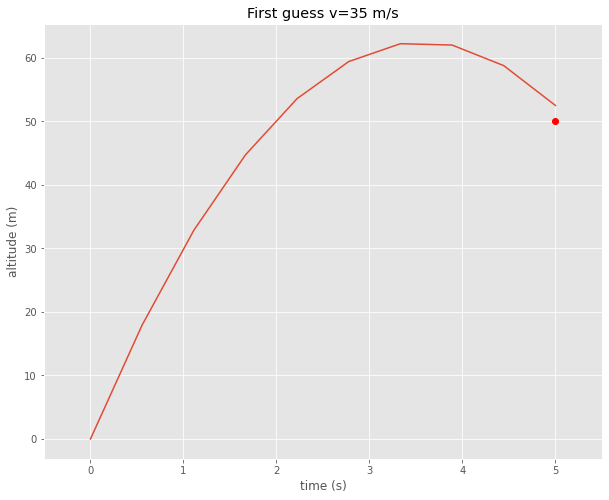

In [2]:
def ffunction(t,s):
    return np.dot(np.array([[0,1],[0,-9.8/s[1]]]),s)
t_span = np.linspace(0, 5, 100)
y0 = 0
v0 = 35
t_eval = np.linspace(0, 5, 10)
sol = solve_ivp(ffunction, [0, 5], \
                [y0, v0], t_eval = t_eval)

plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0])
plt.plot(5, 50, 'ro')
plt.xlabel('time (s)')
plt.xlim(-0.5,5.5)
plt.ylabel('altitude (m)')
plt.title(f'First guess v={v0} m/s')
plt.show()

In [4]:
from scipy.optimize import fsolve

def objective(v0):
    sol = solve_ivp(ffunction, [0, 5],[y0, v0], t_eval = t_eval)
    y = sol.y[0]
    return y[-1] - 50

v0, = fsolve(objective, 10)
print(v0)

34.49999999999999
